https://www.kaggle.com/competitions/techx-facial-expression-recognition/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path dataset
path_train='dataset/train.csv'
path_val='dataset/val.csv'
path_test='dataset/test.csv'

In [3]:
# import dataset
train_df=pd.read_csv(path_train)
val_df=pd.read_csv(path_val, names=['emotion','pixels','Usage'])
test_df=pd.read_csv(path_test)

In [4]:
train_df.head(2)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training


In [5]:
val_df.head(2)

,emotion,pixels,Usage
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
1,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest


In [6]:
test_df.head(2)

,id,pixel
0,1,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
1,2,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...


In [7]:
# get len pixels images
len_val=[]
for i in range (train_df.shape[0]):
    len_val.append(len(train_df['pixels'][i].split()))
    
set(len_val)

{2304}

In [8]:
np.sqrt(2304)

48.0

In [9]:
# Classes
classes=np.unique(train_df['emotion'])
classes

array([0, 1, 2, 3, 4, 5, 6])

In [50]:
# reshape pixels string to image format

train_df['image_pixels']=train_df['pixels'].apply(
    lambda x: np.array(x.split(), dtype=np.float32).reshape(48,48))

val_df['image_pixels']=val_df['pixels'].apply(
    lambda x: np.array(x.split(), dtype=np.float32).reshape(48,48))

test_df['image_pixels']=test_df['pixel'].apply(
    lambda x: np.array(x.split(), dtype=np.float32).reshape(48,48))

In [51]:
train_df.head(3)

,emotion,pixels,Usage,image_pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16..."


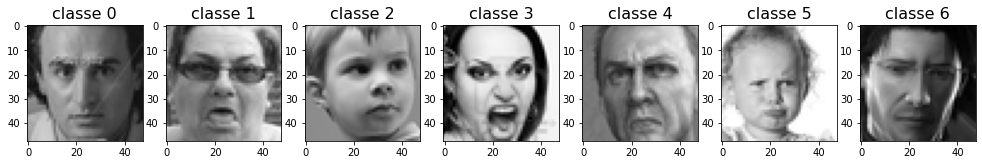

In [68]:
# plot train image examples
i=1
plt.figure(figsize = (17, 8))
for classe in classes:
    cl = train_df[train_df['emotion'] == 0]['image_pixels'].sample(n=2).values[0]
    ax=plt.subplot(1,7,i)
    plt.imshow(cl, cmap='gray', vmin=0, vmax=255)
    plt.title('classe {}'.format(classe),fontsize=16)
    i+=1